---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 6

---
Please write your full name here
- **Name** : "Omnia Sayed Sedik"

# Part 1 PCA

In [76]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline


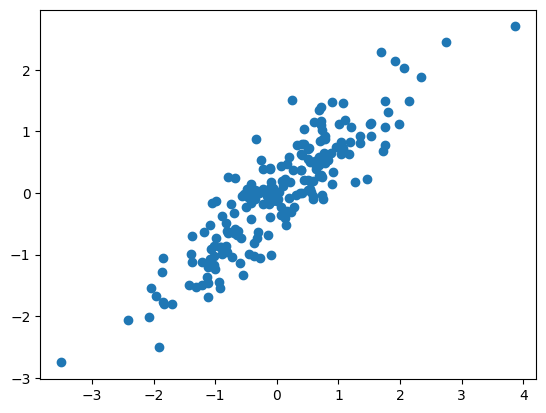

In [77]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## Question 1

Write your own PCA function that will return:
* The sorted eigenvectors of all principal components
* The corresponding eigenvalues
* The transformed data
- Function takes in the data only
    - You can use np.linalg.eig

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [3]:
#### YOUR FUNCTION
def pca(X):
    #get the data mean 
    X_mean = np.mean(X, axis = 0)
    #normalize the data by subtracting the mean
    X_normalized = X - X_mean
    #calc covariance matrix
    cov = np.cov(X_normalized.T)
    #calc eigen vectors and eigen values
    eigen_values, eigen_vectors = np.linalg.eig(cov)
    #sort the eigen vectors and eigen values descending order
    sorting_index = eigen_values.argsort()[::-1]
    sorted_eigenvalue = eigen_values[sorting_index]
    sorted_eigenvectors = eigen_vectors[sorting_index]
    X_transformed = np.dot(X_normalized, sorted_eigenvectors)
    return sorted_eigenvectors, sorted_eigenvalue, X_transformed

## Question 2
- Apply your PCA function to the data given above
- print the pca eigenvalues
- plot the transformed data
- plot the PCA vectors over the ORIGINAL data

In [4]:
## Apply your function
sorted_eigenvectors, sorted_eigenvalues, X_transformed = pca(X) 
# pca(X) 

In [5]:
print("Eigenvalues are: ", sorted_eigenvalues)

Eigenvalues are:  [1.82927343 0.10246373]


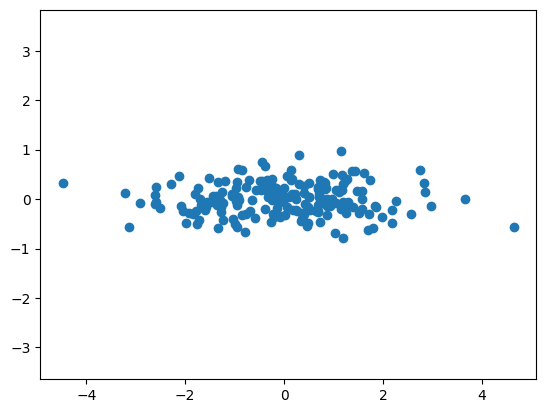

In [6]:
### Plot transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.axis('equal');

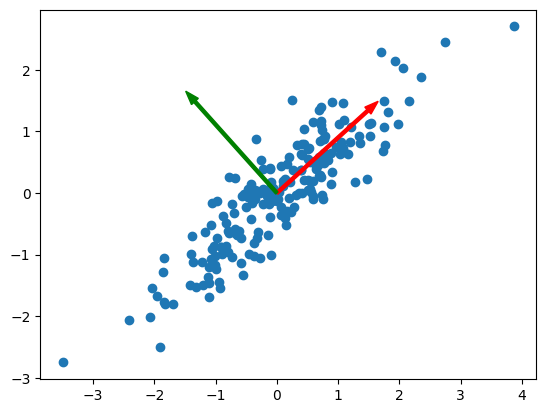

In [7]:
### Plot eigenvectors over ORIGINAL data
scale_factor = 2
# shift the data so that the center point is at the origin
plt.scatter(X[:, 0], X[:, 1])
plt.arrow(0, 0, scale_factor*sorted_eigenvectors[0,0], scale_factor*sorted_eigenvectors[1,0], color='red', width=0.05)
plt.arrow(0, 0, scale_factor*sorted_eigenvectors[0,1], scale_factor*sorted_eigenvectors[1,1], color='green', width=0.05)

## Question 3

- Apply sklearn's PCA function to the same data
- print the pca eigenvalues

In [8]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)

[1.82927343 0.10246373]


## Question 4
- Appl sklearn PCA using 1 component only
- print shape of transformed data
- plot the transformed data

In [9]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)
x_transformed = pca.transform(X)
print(x_transformed.shape)

(200, 1)


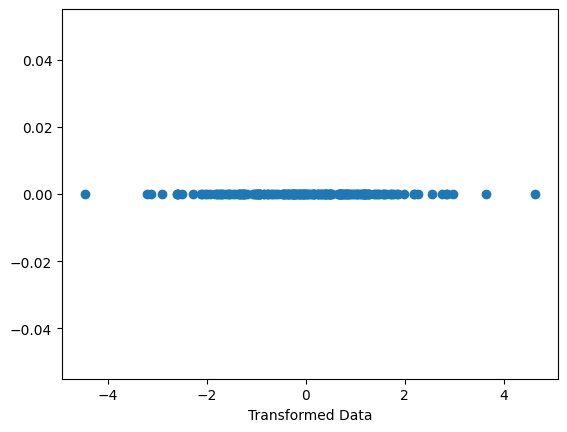

In [10]:
plt.scatter(x_transformed, np.zeros_like(x_transformed))
# set the x-axis and y-axis labels
plt.xlabel("Transformed Data")
plt.ylabel("")
# show the plot
plt.show()

# Part 2 SVM

### Use the following function to plot the classification regions

In [11]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [13]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=42 and 20% of the data for testing)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Question 2
1. Train an SVM classifier using linear kernel (use SVC)
2. Plot the classification regions using the training dataset.

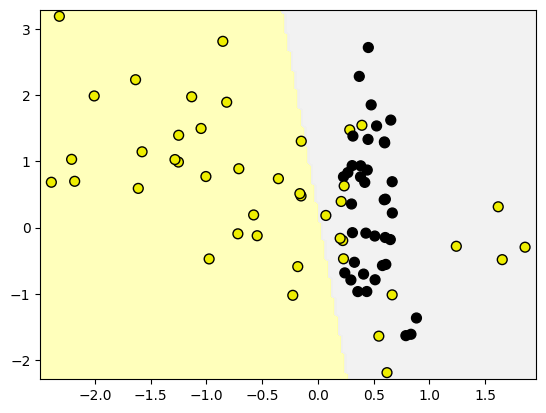

<class 'numpy.ndarray'>


In [58]:
from sklearn.svm import SVC
clf =  SVC(kernel='linear')
clf.fit(X_train, y_train)
plot_class_regions_for_classifier(clf, X_train, y_train)

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00002.
2. Train another SVM classifier using linear kernel with C=200
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

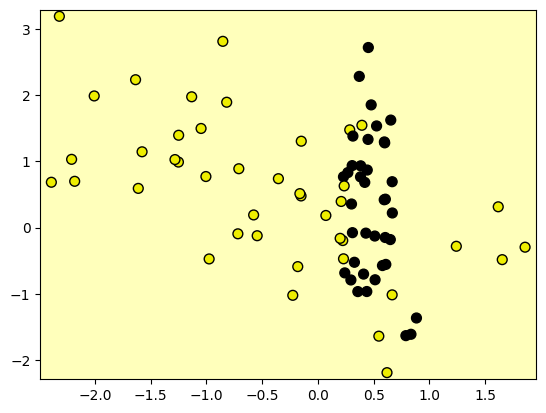

In [25]:
from sklearn.svm import SVC
clf_small_c =  SVC(kernel='linear', C = 0.00002)
clf_small_c.fit(X_train, y_train)
plot_class_regions_for_classifier(clf_small_c, X_train, y_train)

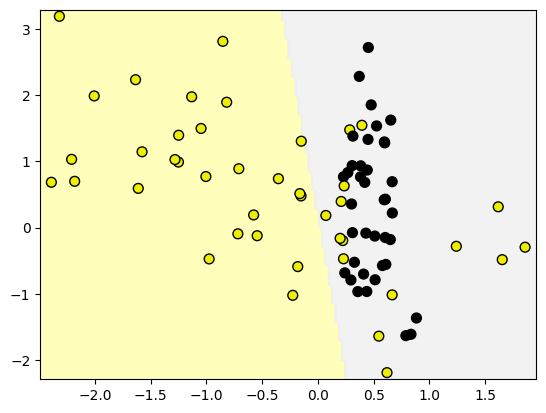

In [26]:
from sklearn.svm import SVC
clf_large_c =  SVC(kernel='linear', C = 200)
clf_large_c.fit(X_train, y_train)
plot_class_regions_for_classifier(clf_large_c, X_train, y_train)

In [27]:
# smaller value of C creates a wider margin hyperplane and allows more training errors,
# while a larger value of C creates a narrower margin hyperplane and forces the model to correctly classify more training examples.

### Use the fruits dataset in questions 4, 5, 6.

In [33]:
import pandas as pd
fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=42, and 20% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm using random_state=42, C=10

In [52]:
X_fruits = fruits.columns.values
y_fruits = fruits.iloc[:,:].values
X_width_height = fruits.loc[:, ['width', 'height']]
y_width_height = fruits.loc[:, 'fruit_label']

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train_fruits, X_test_fruits, y_train_fruits, y_test_fruits = train_test_split(X_width_height, y_width_height, test_size=0.2, random_state=42)
clf_fruits =  SVC(kernel='linear', C = 10, random_state= 42)
clf_fruits.fit(X_train_fruits, y_train_fruits)

SVC(C=10, kernel='linear', random_state=42)

#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

In [55]:
#only one model has been trianed the svm calssifier uses one versus all stratgy so only one model has been trained

# print the coefficients and intercept
print('Coefficients:', clf_fruits.coef_)
print('Intercepts:', clf_fruits.intercept_)

Coefficients: [[ 0.36269408  0.62176129]
 [ 2.06441743 -3.22539809]
 [ 2.63699296 -1.09874807]
 [-0.20771511 -0.74183969]
 [ 0.         -0.68965518]
 [ 3.47672473 -1.44863984]]
Intercepts: [ -6.03626612   8.85553464  -9.15259475   5.65875364   4.17241386
 -11.74851735]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


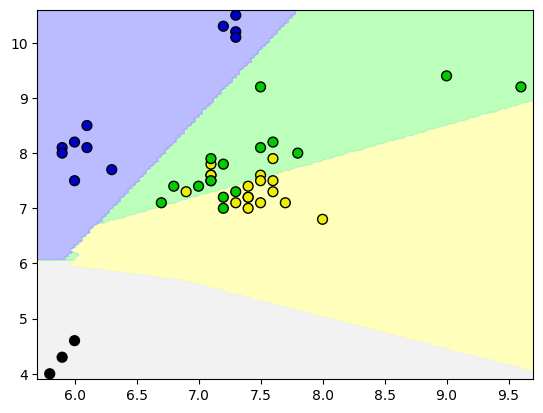

In [60]:
plot_class_regions_for_classifier(clf_fruits, X_train_fruits.values, y_train_fruits.values)
# print(type(X_train_fruits))

In [62]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 42, and 20% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM  (SVC) classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [69]:
from sklearn.model_selection import GridSearchCV
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)
grid_search_clf = SVC()
# define the hyperparameter grid
param_grid = {'kernel': ['poly', 'rbf'], 'C': [0.01, 0.1, 0.5, 1, 10]}
# perform a grid search over the hyperparameters
grid_search = GridSearchCV(grid_search_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_cancer, y_train_cancer)
# print the best hyperparameters
print('Best kernel:', grid_search.best_params_['kernel'])
print('Best C:', grid_search.best_params_['C'])

Best kernel: poly
Best C: 10


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [67]:
best_param_classifier = SVC(C =10, kernel ='poly')
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
print('Accuracy of SVC on training set: {:.2f}'
     .format(train_acc))
print('Accuracy of SVC on test set: {:.2f}'
     .format(test_acc))

Accuracy of SVC on training set: 0.81
Accuracy of SVC on test set: 0.70


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
# apply feature scaling to the training and testing data
scaler = StandardScaler()
X_train_cancer_scaled = scaler.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler.transform(X_test_cancer)
# apply feature selection using SelectKBest with f_classif score function
selector = SelectKBest(f_classif, k=2)
X_train_selected = selector.fit_transform(X_train_cancer_scaled, y_train_cancer)
X_test_selected = selector.transform(X_test_cancer_scaled)
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_selected, y_train_cancer)
# define the hyperparameter grid for grid search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['rbf']}
# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_selected, y_train_cancer)
# create an SVM classifier with the best hyperparameters
clf = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], kernel='rbf')

# fit the classifier on the training data
clf.fit(X_train_selected, y_train_cancer)

# predict on the training and testing data
y_train_pred = clf.predict(X_train_selected)
y_test_pred = clf.predict(X_test_selected)

# calculate and print the training and testing accuracy
train_acc = accuracy_score(y_train_cancer, y_train_pred)
test_acc =accuracy_score(y_test_cancer, y_test_pred)

In [81]:
print('Accuracy of SVC on training set: {:.2f}'
     .format(train_acc))
print('Accuracy of SVC on test set: {:.2f}'
     .format(test_acc))

Accuracy of SVC on training set: 0.93
Accuracy of SVC on test set: 0.93
